# ESTATISTICA MODULO 1

In [1]:
from scipy.stats import binom

## DISTRIBUICAO BINOMIAL

In [5]:
# calcular a probabilidade de jogar uma moeda e dar cara 3 vezes
# primeiro parametro : 3 retorno desejado 
# segundo parametro : 5 total de tentativas
# terceiro parametro : 0.5 probabilidade isolada de cada evento.
probabilidade = binom.pmf(3,5,0.5)
probabilidade

0.3125

In [17]:
# probabilidade de passando 4 sinais de 4 tempos passar por 
# 0 , 1, 2, 3 e 4 sinais verdes.
probabilidades = [binom.pmf(0,4,0.25),
binom.pmf(1,4,0.25),
binom.pmf(2,4,0.25),
binom.pmf(3,4,0.25),
binom.pmf(4,4,0.25)]
i = 0
for probabilidade in probabilidades:
    print(f'{i} semaforo(s) : {probabilidade}')
    i+=1

0 semaforo(s) : 0.31640625000000006
1 semaforo(s) : 0.4218750000000001
2 semaforo(s) : 0.21093750000000006
3 semaforo(s) : 0.046875000000000035
4 semaforo(s) : 0.003906250000000001


In [26]:
# Probabilidade acumulada
binom.cdf(3,4,0.25)

0.99609375

## DISTRIBUICAO NORMAL

In [37]:
import numpy as np
import pandas as pd

In [104]:
normal = pd.DataFrame(np.random.randn(1500))

In [105]:
normal.describe()

,0
count,1500.000000
mean,0.003290
std,0.986692
min,-3.529321
25%,-0.658425
50%,-0.008881
75%,0.682300
max,2.936866


In [47]:
normal.std()[0]

1.0670964502609936

In [57]:
normal.mean()[0]

0.13378925803396935

In [74]:
desvio = normal.std()[0]
media = normal.mean()[0]
n = 1
tamanho = normal.count()
normal[(normal[0] <= media-(desvio*n)) | (normal[0] >= media+(desvio*n))].count()



0    325
dtype: int64

In [75]:
tamanho

0    1000
dtype: int64

In [106]:
def verifica_normal(coluna):
    desvios = [1,2,3]
    n = 1
    desvio = coluna.std()[0]
    media = coluna.mean()[0]
    tamanho = coluna.count()[0]
    primeiro_std = coluna[(coluna[0] <= media-(desvio*n)) | (coluna[0] >= media+(desvio*n))].count()[0]
    print(f'Tamanho da amostra : {tamanho}')
    print(f'Media da amostra : {media}')
    print(f'Desvio P. da amostra : {desvio}')
    print(f'Dentro do 1 Desvio P. da amostra : {tamanho - primeiro_std} / {((tamanho - primeiro_std)/tamanho)*100} %')
    for n in desvios:
        std = coluna[(coluna[0] <= media-(desvio*n)) | (coluna[0] >= media+(desvio*n))].count()[0]
        print(f'Acima do {n} Desvio P. da amostra : {std} / {((std)/tamanho)*100} %')

In [107]:
verifica_normal(normal)

Tamanho da amostra : 1500
Media da amostra : 0.0032896811604454755
Desvio P. da amostra : 0.986691579739552
Dentro do 1 Desvio P. da amostra : 1023 / 68.2 %
Acima do 1 Desvio P. da amostra : 477 / 31.8 %
Acima do 2 Desvio P. da amostra : 71 / 4.733333333333333 %
Acima do 3 Desvio P. da amostra : 1 / 0.06666666666666667 %


In [108]:
# definicoes da distribuicao normal 
# media central 
# 68 % dos dados dentro do primeiro desvio padrao
# 27% dentro do segundo desvio
# 4 % dentro do terceiro

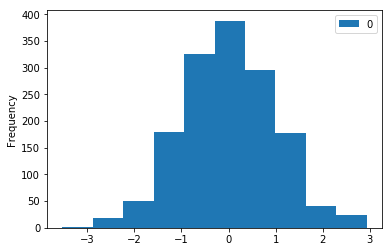

In [110]:
normal.plot.hist()

In [1]:
import pandas as pd

In [3]:
ocorrencias = pd.read_csv('../data/oco.csv', sep='~')

In [7]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 22 columns):
codigo_ocorrencia                 5250 non-null int64
ocorrencia_classificacao          5250 non-null object
ocorrencia_tipo                   5250 non-null object
ocorrencia_tipo_categoria         5250 non-null object
ocorrencia_tipo_icao              5250 non-null object
ocorrencia_latitude               5250 non-null float64
ocorrencia_longitude              5250 non-null float64
ocorrencia_cidade                 5250 non-null object
ocorrencia_uf                     5250 non-null object
ocorrencia_pais                   5250 non-null object
ocorrencia_aerodromo              5250 non-null object
ocorrencia_dia                    5250 non-null object
ocorrencia_horario                5250 non-null object
investigacao_aeronave_liberada    1152 non-null object
investigacao_status               5250 non-null object
divulgacao_relatorio_numero       5250 non-null object
divulgacao_r

In [8]:
ocorrencias[ocorrencias.ocorrencia_cidade=='FORTALEZA'].head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
1352,201408238460342,ACIDENTE,COM HÉLICE,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-3.7758,-38.5322,FORTALEZA,CE,BRASIL,...,17:34:00,NaN,FINALIZADA,A-145/CENIPA/2014,SIM,2015-05-15,0,1,NÃO,2018-10-12
1353,201008287136381,INCIDENTE,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,-3.7238,-38.5899,FORTALEZA,CE,BRASIL,...,15:25:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-10-12


ESTOURO DE PNEU                                        10
FALHA DO MOTOR EM VOO                                   7
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE      5
OUTROS                                                  5
COM TREM DE POUSO                                       3
SUPERAQUECIMENTO                                        2
COLISÃO COM OBSTÁCULOS NO SOLO                          2
FOGO NO SOLO                                            1
TRÁFEGO AÉREO                                           1
CORTANTE DE VENTO / TEMPESTADE                          1
FUMAÇA NA CABINE                                        1
PERDA DE CONTROLE NO SOLO                               1
COM HÉLICE                                              1
POUSO SEM TREM                                          1
PERDA DE COMPONENTE NO SOLO                             1
FALHA DO MOTOR NO SOLO                                  1
SOPRO DE REATOR                                         1
VAZAMENTO DE O